<a href="https://colab.research.google.com/github/onmyeoin/tensorflow/blob/main/03_intro_to_computervision_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-14 15:31:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.6s    

2023-03-14 15:31:45 (18.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

* crucial step

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

In [6]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


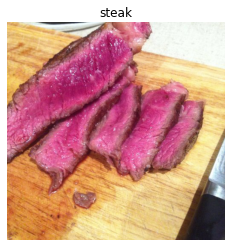

In [9]:

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.90980392, 0.74117647, 0.47058824],
        [0.87058824, 0.70196078, 0.43529412],
        [0.88235294, 0.71372549, 0.44705882],
        ...,
        [0.94509804, 0.95686275, 0.92941176],
        [0.94901961, 0.96078431, 0.93333333],
        [0.94509804, 0.95686275, 0.92941176]],

       [[0.86666667, 0.69803922, 0.43137255],
        [0.84705882, 0.67843137, 0.41176471],
        [0.87058824, 0.69803922, 0.44313725],
        ...,
        [0.9372549 , 0.94901961, 0.92156863],
        [0.94509804, 0.95686275, 0.92941176],
        [0.94509804, 0.95686275, 0.92941176]],

       [[0.85490196, 0.67843137, 0.42352941],
        [0.85098039, 0.6745098 , 0.41960784],
        [0.88627451, 0.70588235, 0.4627451 ],
        ...,
        [0.9372549 , 0.94901961, 0.92156863],
        [0.94117647, 0.95294118, 0.9254902 ],
        [0.93333333, 0.94509804, 0.91764706]],

       ...,

       [[0.93333333, 0.7372549 , 0.49019608],
        [0.89019608, 0.69019608, 0.44313725],
        [0.84705882, 0

### Building a CNN to find patterns in images

* load images
* preproccess images
* Build a CNN to find patterns in images
* Compile our CNN
* Fit the imaages to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 237ms/step - loss: 0.6250 - accuracy: 0.6447 - val_loss: 0.4467 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 11s 246ms/step - loss: 0.4697 - accuracy: 0.7853 - val_loss: 0.3815 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4396 - accuracy: 0.8067 - val_loss: 0.4329 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4204 - accuracy: 0.8100 - val_loss: 0.3975 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3851 - accuracy: 0.8287 - val_loss: 0.3493 - val_accuracy: 0.8660


### Multi Class image classification

Steps:

1. Become one with the data (visualise)
2. Preprocess the data (scale, augment etc)
3. Create a model (baseline/simple model first)
4. Fit the model (overfit initially)
5. Evaluate the model
6. Adjust hyperparams (beat baseline/reduce overfitting)
7. Repeat until satisfied

In [12]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()





--2023-03-14 15:32:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.2MB/s    in 23s     

2023-03-14 15:33:21 (21.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [13]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 10 directories and 0 images in 10_fo

In [14]:
# Set up the train and test dirs

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [15]:
# Lets get class names (needed for top category, bottom category and colour)

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


# 1. Visualise data

In [16]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (492, 512, 3)


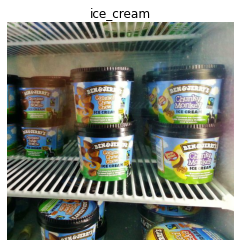

In [17]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2. Preproccesing data

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224), 
                                             batch_size=32,
                                             class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Create model -> start with baseline

* take the model on CNN website

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model

model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # Changed to have 10 output neurons (10 classes) and softmax
])

# Compile model

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                       # validations_steps=len(0.25 * test_data), # -> this would make the model fit quicker by only validaing on 25% of test data
                        validation_steps=len(test_data),
                        )

Epoch 1/5
235/235 [==============================] - 52s 212ms/step - loss: 2.1286 - accuracy: 0.2261 - val_loss: 1.9773 - val_accuracy: 0.3052
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.9017 - accuracy: 0.3435 - val_loss: 1.8596 - val_accuracy: 0.3524
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.5997 - accuracy: 0.4595 - val_loss: 1.9340 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 60s 257ms/step - loss: 1.1108 - accuracy: 0.6323 - val_loss: 2.1563 - val_accuracy: 0.3144
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.5265 - accuracy: 0.8381 - val_loss: 3.0355 - val_accuracy: 0.2880


# 5. Evaluate the model

In [23]:
# Evaluate on test data

model_8.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 3.0355 - accuracy: 0.2880


[3.035494804382324, 0.2879999876022339]

In [24]:

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

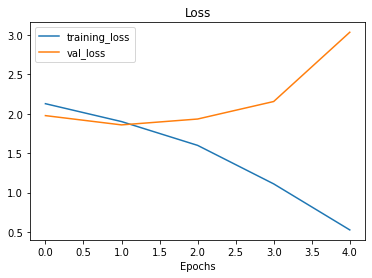

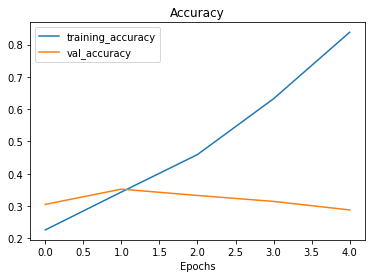

In [25]:
# Check out the loss curves

plot_loss_curves(history_8)

#### What do these models tell us?

* The model is overfitting
* can tell by the direction of the training and validation curves moving in opposite directions 
* ideally we want these curves to move in tandem (so the model performs well on both the train and the test data)


# 6. Adjust model (to reduce overfitting)]

* more data
* data augmentation
* Better data
* Transfer Learning

In [30]:
# How about we try data augmentation

# Create and augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [36]:
# Lets create another model but this time on augmented data


# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as used for model_10)
model_10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [37]:
# fit the model

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 123s 515ms/step - loss: 2.2365 - accuracy: 0.1663 - val_loss: 2.1173 - val_accuracy: 0.2164
Epoch 2/5
235/235 [==============================] - 127s 541ms/step - loss: 2.1051 - accuracy: 0.2501 - val_loss: 1.9031 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 118s 501ms/step - loss: 2.0443 - accuracy: 0.2744 - val_loss: 1.8914 - val_accuracy: 0.3172
Epoch 4/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9811 - accuracy: 0.3036 - val_loss: 1.7912 - val_accuracy: 0.3784
Epoch 5/5
235/235 [==============================] - 118s 501ms/step - loss: 1.9518 - accuracy: 0.3241 - val_loss: 1.7553 - val_accuracy: 0.3920


In [38]:
model_10.evaluate(test_data)

79/79 [==============================] - 22s 281ms/step - loss: 1.7553 - accuracy: 0.3920


[1.7552865743637085, 0.3919999897480011]

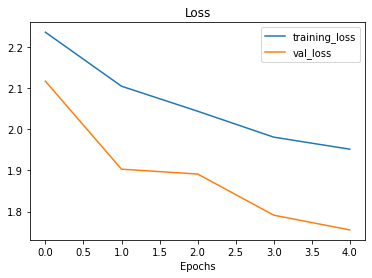

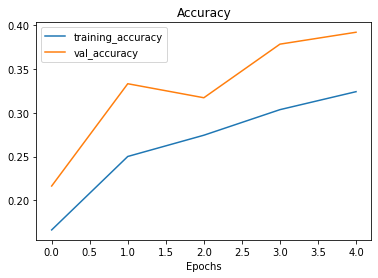

In [39]:
plot_loss_curves(history_10)

# 7. Repeat until satisfied

* run experiments to get loss curves closer together
* adjust hyperparams in imageDataGen instance
* train for longer
* add layers
* add more data
* try **transfer learning**